In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = '100'
from sklearn.metrics import auc
import os
import numpy as np
import pandas as pd
from plotting import * 

import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
df1_ele = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v18/run_01/validation_data/validation_dataset_v11_ele.csv", sep=";")
df1_gamma = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v18/run_01/validation_data/validation_dataset_v11_gamma.csv", sep=";")
# df_nomatch = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_nomatch.csv", sep=";")

In [3]:
df2_ele = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v19/run_03/validation_data/validation_dataset_v11_ele.csv", sep=";")
df2_gamma = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v19/run_03/validation_data/validation_dataset_v11_gamma.csv", sep=";")
# df_nomatch = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_nomatch.csv", sep=";")

In [4]:
def bin_analysis(col):
    def f(df):
        m = df[col].mean()
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.025) - df[col].quantile(0.975))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

In [5]:
import mplhep as hep
plt.style.use(hep.style.CMS)

Text(0.01, 1.02, 'Without/with shower shapes')

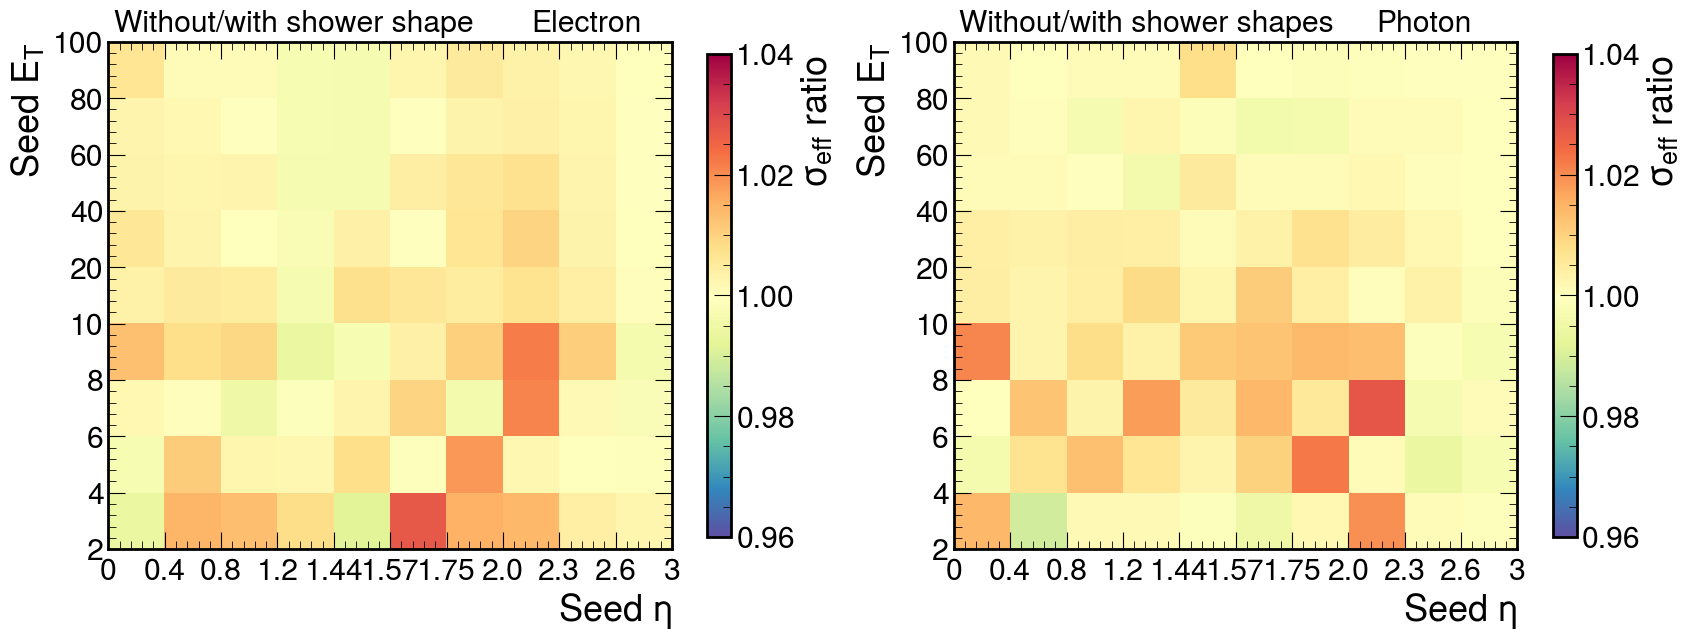

In [13]:
fig, axs = plt.subplots(1,2, figsize=(20, 8),dpi=100, )
plt.subplots_adjust( wspace=0.2)

ets = [2,4,6,8,10,20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df1_ele["et_bin"] = pd.cut(df1_ele.et_seed, ets, labels=list(range(len(ets)-1)))
df1_ele["eta_bin"] = pd.cut(df1_ele.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))
df1_gamma["et_bin"] = pd.cut(df1_gamma.et_seed, ets, labels=list(range(len(ets)-1)))
df1_gamma["eta_bin"] = pd.cut(df1_gamma.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))
df2_ele["et_bin"] = pd.cut(df2_ele.et_seed, ets, labels=list(range(len(ets)-1)))
df2_ele["eta_bin"] = pd.cut(df2_ele.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))
df2_gamma["et_bin"] = pd.cut(df2_gamma.et_seed, ets, labels=list(range(len(ets)-1)))
df2_gamma["eta_bin"] = pd.cut(df2_gamma.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


res1_ele = df1_ele.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res1_gamma  = df1_gamma.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res1_ele.reset_index(level=0, inplace=True)
res1_ele.reset_index(level=0, inplace=True)
res1_gamma.reset_index(level=0, inplace=True)
res1_gamma.reset_index(level=0, inplace=True)

res2_ele = df2_ele.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res2_gamma  = df2_gamma.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res2_ele.reset_index(level=0, inplace=True)
res2_ele.reset_index(level=0, inplace=True)
res2_gamma.reset_index(level=0, inplace=True)
res2_gamma.reset_index(level=0, inplace=True)


vmax= 0.96
vmin = 1.04
palette = "Spectral_r"

a1 = res1_ele.w68.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan
b1 = res1_gamma.w68.values.reshape((len(etas)-1,len(ets)-1))
b1[b1==0] = np.nan

a2 = res2_ele.w68.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan
b2 = res2_gamma.w68.values.reshape((len(etas)-1,len(ets)-1))
b2[b2==0] = np.nan


ax = axs[0]
A = ax.imshow( (a2/a1).T,  cmap=palette , vmin=vmin, vmax=vmax)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="$\sigma_{eff}$ ratio", ax=ax, shrink=0.8)
ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)
ax.text(0.75, 1.02, "Electron", transform=ax.transAxes,  fontsize="small")
ax.text(0.01, 1.02, "Without/with shower shape", transform=ax.transAxes,  fontsize="small")


ax = axs[1]
A = ax.imshow( (b2/b1).T,   cmap=palette , vmin=vmin, vmax=vmax)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="$\sigma_{eff}$ ratio", ax=ax, shrink=0.8)
ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)
ax.text(0.75, 1.02, "Photon", transform=ax.transAxes,  fontsize="small")
ax.text(0.01, 1.02, "Without/with shower shapes", transform=ax.transAxes,  fontsize="small")
